In [7]:
%matplotlib inline
import EDXRD as edx
import matplotlib.pyplot as plt


Data taken from October ANL beamrun. Cylindrically averaged spatially resolved EDX data on high and low pH concretes. 


The first step in data processing is understanding the data set. 


Files were saved as HDF5 and are read using an HDF python package. No sample information or metadata is saved in the HDF files besides a scan number. Using a lab notebook formatted as a CSV in the same directory as the files, a function from the EDX package I wrote goes through a file directory, matches up the scan number from the HDF file to a scan number in the lab notebook, and populates a data frame.

In [45]:
directory = '/Users/anthonygironda/Documents/MDA_Scans_Seidler/'
meta_nb = '7bmb1_10.19.22_EDXindex.csv'
sample_df = edx.gen_spec_df(directory, meta_nb)
display(sample_df)
# display(sample_df.head())
# display(sample_df.tail())

,ScanNum,FullName,pH,Days,Temperature,Atmosphere,SteelFiber,Aborted,Notes,Start (mm),End (mm),Step Size (mm),Slit Entrance (um),Scan Time,Rotation Speed (deg/s),FileName,Spectra,Position
0,1066,Foil Scan 1,NaN,NaN,NaN,NaN,NaN,False,EDX Commisioning,NaN,NaN,NaN,NaN,NaN,NaN,/Users/anthonygironda/Documents/MDA_Scans_Seid...,"[[0.0, 221.0, 295.0, 314.0, 334.0, 354.0, 354....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,1067,Foil Scan 2,NaN,NaN,NaN,NaN,NaN,False,EDX Commisioning,NaN,NaN,NaN,NaN,NaN,NaN,/Users/anthonygironda/Documents/MDA_Scans_Seid...,"[[0.0, 203.0, 278.0, 317.0, 330.0, 369.0, 349....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,1068,Foil Scan 3,NaN,NaN,NaN,NaN,NaN,False,EDX Commisioning,NaN,NaN,NaN,NaN,NaN,NaN,/Users/anthonygironda/Documents/MDA_Scans_Seid...,"[[0.0, 849.0, 945.0, 1174.0, 1282.0, 1385.0, 1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,1069,Mo W Energy Calibration,NaN,NaN,NaN,NaN,NaN,False,EDX Calibration,NaN,NaN,NaN,NaN,90.0,NaN,/Users/anthonygironda/Documents/MDA_Scans_Seid...,"[0.0, 5366.0, 6316.0, 7253.0, 7844.0, 8473.0, ...",[]
4,1070,LaB6,NaN,NaN,NaN,NaN,NaN,False,EDX Commisioning,NaN,NaN,NaN,NaN,90.0,NaN,/Users/anthonygironda/Documents/MDA_Scans_Seid...,"[0.0, 5138.0, 6247.0, 7093.0, 7730.0, 8211.0, ...",[]
5,1071,Calcite (CaCO3),NaN,NaN,NaN,NaN,NaN,False,EDX Calibration,NaN,NaN,NaN,NaN,90.0,NaN,/Users/anthonygironda/Documents/MDA_Scans_Seid...,"[0.0, 5150.0, 6166.0, 7062.0, 7600.0, 8218.0, ...",[]
6,1072,High pH SF 25C 14d,High,14.0,25.0,100% CO2,True,False,Commisioning,13.0,6.0,1.00,250.0,20.0,NaN,/Users/anthonygironda/Documents/MDA_Scans_Seid...,"[0.0, 1054.0, 1230.0, 1444.0, 1533.0, 1597.0, ...",[]
7,1073,High pH SF 25C 14d,High,14.0,25.0,100% CO2,True,False,Commisioning,13.0,6.0,1.00,250.0,20.0,NaN,/Users/anthonygironda/Documents/MDA_Scans_Seid...,"[[0.0, 106.0, 120.0, 128.0, 174.0, 164.0, 185....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
8,1074,High pH SF 25C 14d,High,14.0,25.0,100% CO2,True,False,Commisioning,13.0,6.0,1.00,250.0,20.0,NaN,/Users/anthonygironda/Documents/MDA_Scans_Seid...,"[[0.0, 98.0, 110.0, 135.0, 170.0, 159.0, 162.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
9,1075,High pH SF 25C 14d,High,14.0,25.0,100% CO2,True,False,Commisioning,13.0,6.0,1.00,250.0,20.0,NaN,/Users/anthonygironda/Documents/MDA_Scans_Seid...,"[0.0, 6217.0, 7384.0, 8390.0, 9519.0, 9998.0, ...",[]


The next step is to determine energy scale, presently spectra are just plotted along by bin numbers. Scan 1069 // Index 3 is a calibration scan of a Molybdenum and Tungsten foil. 

By identifying emission edges in the calibration and the bins that they occur, an energy scale can be established. I can plot it in many ways, but for now I'll initially avoid the object oriented approach of the EDX package. The calibration scan looks like this:

Text(0.5, 1.0, 'Molybdenum / Tungsten Foil Energy Calibration Scan')

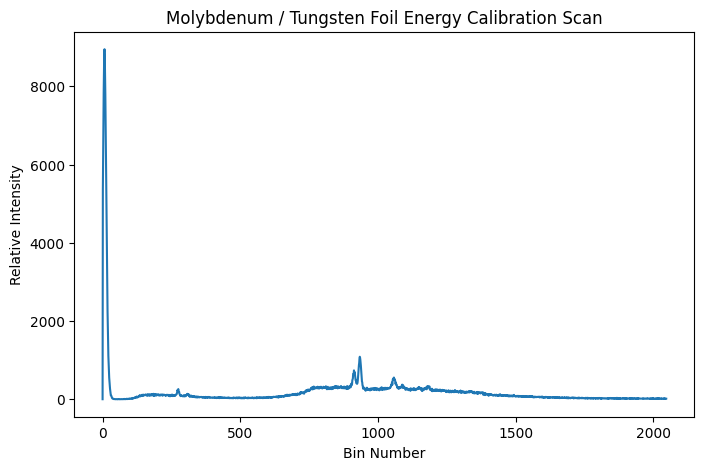

In [9]:
cal_scan_spectra = sample_df['Spectra'][3]
cal_scan_bins = list(range(len(cal_scan_spectra)))
cal_plot, cal_axis = plt.subplots(figsize = (8,5))
cal_axis.plot(cal_scan_bins,cal_scan_spectra)
cal_axis.set_xlabel('Bin Number')
cal_axis.set_ylabel('Relative Intensity')
cal_axis.set_title('Molybdenum / Tungsten Foil Energy Calibration Scan')
# cal_axis.set_xlim(0,1000)
# cal_axis.set_ylim(0,1500)

To establish an energy scale and convert bins to energy, I need to match up known emission features of the calibration scan, identify their bin #, and use them to determine the energy scale and bin-energy conversion factor. 

Here is a mosaic of the calibration scan with labelled spectral features:

Text(1150, 1300, 'W Kβ\nBin# 1058')

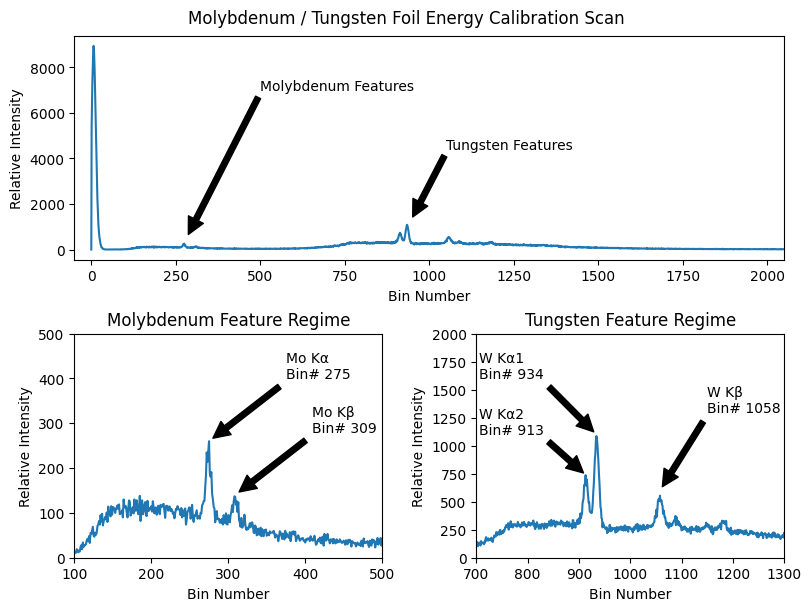

In [10]:
cal_fig = plt.figure(figsize=(8, 6), layout="constrained")
spec = cal_fig.add_gridspec(2, 2)
ax0 = cal_fig.add_subplot(spec[0, :])
ax10 = cal_fig.add_subplot(spec[1, 0])
ax11 = cal_fig.add_subplot(spec[1, 1])
cal_ax = [ax0, ax10, ax11]
alpha = '\u03B1'
beta = '\u03B2'
cal_fig.suptitle('Molybdenum / Tungsten Foil Energy Calibration Scan')
cal_ax[0].plot(cal_scan_bins, cal_scan_spectra)
cal_ax[1].plot(cal_scan_bins, cal_scan_spectra)
cal_ax[2].plot(cal_scan_bins, cal_scan_spectra)
cal_ax[0].set_xlim(-50,2050)
cal_ax[0].set_xlabel('Bin Number')
cal_ax[0].set_ylabel('Relative Intensity')
cal_ax[1].set_xlim(100,500)
cal_ax[1].set_ylim(0,500)
cal_ax[1].set_title('Molybdenum Feature Regime')
cal_ax[1].set_xlabel('Bin Number')
cal_ax[1].set_ylabel('Relative Intensity')
cal_ax[2].set_xlim(700,1300)
cal_ax[2].set_ylim(0,2000)
cal_ax[2].set_title('Tungsten Feature Regime')
cal_ax[2].set_xlabel('Bin Number')
cal_ax[2].set_ylabel('Relative Intensity')
cal_ax[0].annotate('Molybdenum Features', (285,600), (500, 7000), arrowprops=dict(facecolor='black', shrink=0.01))
cal_ax[0].annotate('Tungsten Features', (950,1400), (1050, 4400), arrowprops=dict(facecolor='black', shrink=0.01))
cal_ax[1].annotate('Mo K' + alpha + '\nBin# 275', (275,260), (375, 400), arrowprops=dict(facecolor='black', shrink=0.05))
cal_ax[1].annotate('Mo K' + beta + '\nBin# 309', (309,140), (409, 280), arrowprops=dict(facecolor='black', shrink=0.05))
cal_ax[2].annotate('W K' + alpha + '1\nBin# 934', (934,1100), (705, 1600), arrowprops=dict(facecolor='black', shrink=0.05))
cal_ax[2].annotate('W K' + alpha + '2\nBin# 913', (913,740), (705, 1100), arrowprops=dict(facecolor='black', shrink=0.05))
cal_ax[2].annotate('W K' + beta + '\nBin# 1058', (1058,600), (1150, 1300), arrowprops=dict(facecolor='black', shrink=0.05))

We can use these features to match bins to energy and convert scale from bins to eV and store them as tuples:

In [42]:
Mo_ka = (275, 17444.3)
Mo_kb = (309, 19608.3)
W_ka2 = (913, 57981.7)
W_ka1 = (934, 59318.24)
W_kb = (1058, 67244.3)

Instantiating scans can be done manually or by using the instantiator helper. Any spectra at some position or even spectra given at no position (like the empty position list of the calibration scan 1069) can be instantiated using the helper function. Once a scan object has been made, many quick plotting methods become available to the class.

I'll initialize a scan object of the calibration foil, using a helper function:

(<Figure size 1000x600 with 1 Axes>, <AxesSubplot: >)

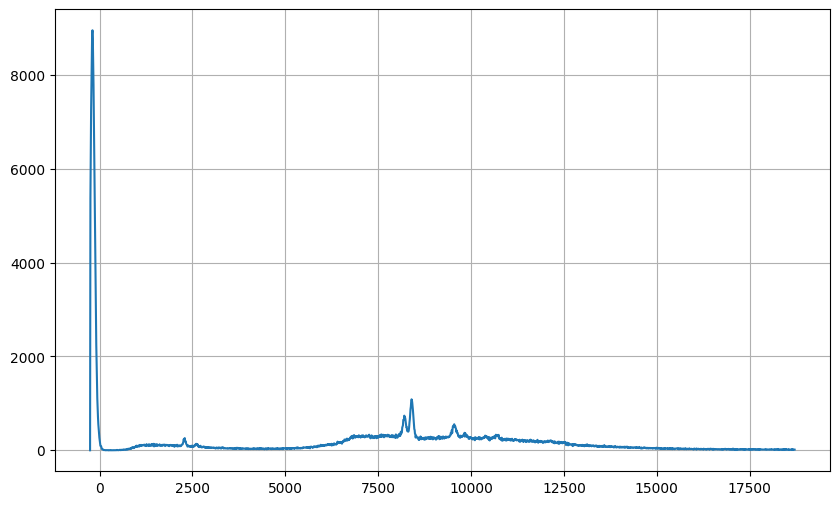

In [32]:
Mo_W_cal = edx.scan_instant_helper(sample_df, 1069, 0, True)
Mo_W_cal.quick_scatter1()

There's a second important scan I want to instantiate before looking at concrete sample scan sets; scan #1071 is a reference scan on calcite. Let's instantiate that as well

(7500.0, 16000.0)

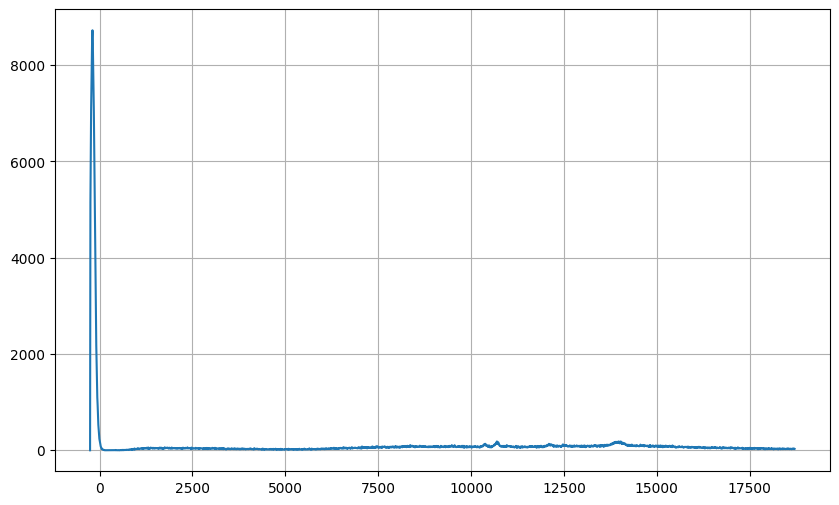

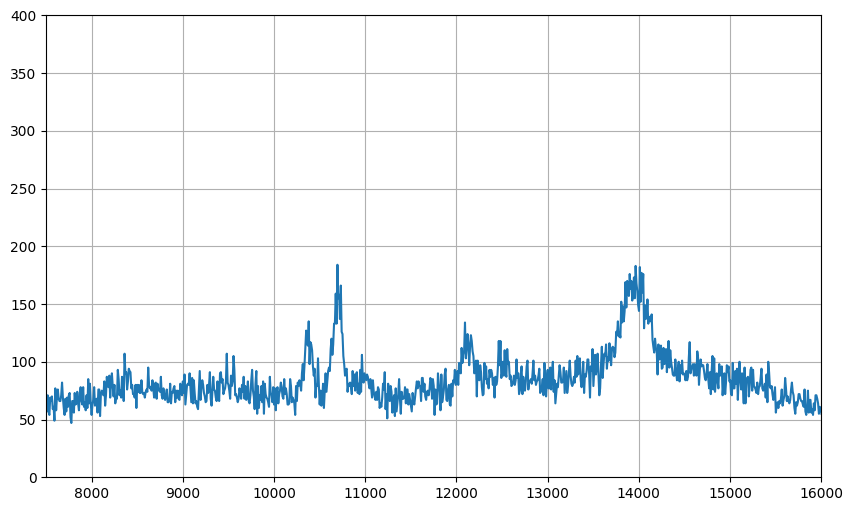

In [39]:
calcite_ref = edx.scan_instant_helper(sample_df, 1071, 0, True)

calcite_ref.quick_scatter1()
(calcite_fig, calcite_ax) = calcite_ref.quick_scatter1()
calcite_ax.set_ylim(0,400)
calcite_ax.set_xlim(7500,16000)
